<a href="https://colab.research.google.com/github/korshunov418/-Python-Data-Science/blob/sum/AKorshunov_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Подключение библиотек и скриптов**

In [6]:
import numpy as np
import pandas as pd

**Пути к файлам**

In [7]:
#TRAIN
DATASET_TRAIN_PATH = '/content/drive/MyDrive/course_project_train.csv'
#TEST
DATASET_TEST_PATH = '/content/drive/MyDrive/course_project_test.csv'
PREP_DATASET_PATH = '/content/drive/MyDrive/training_project_data_pred.csv'

**Загрузка данных**

#EDA

##Просмотр данных

In [159]:
df = pd.read_csv(DATASET_TRAIN_PATH)
df_prep = pd.read_csv(PREP_DATASET_PATH)
df.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


In [160]:
df.tail(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0
7499,Rent,NaN,4 years,0.0,8.0,9.4,480832.0,0.0,NaN,0.0,debt consolidation,Short Term,26928.0,288192.0,9061.0,NaN,0


In [161]:
df.shape

(7500, 17)

In [162]:
df.iloc[0]
#df.columns

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [163]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

##Обзор данных

**Описание датасета**

Home Ownership - домовладение  
Annual Income - годовой доход  
Years in current job - количество лет на текущем месте работы  
Tax Liens - налоговые обременения  
Number of Open Accounts - количество открытых счетов  
Years of Credit History - количество лет кредитной истории  
Maximum Open Credit - наибольший открытый кредит  
Number of Credit Problems - количество проблем с кредитом  
Months since last delinquent - количество месяцев с последней просрочки платежа  
Bankruptcies - банкротства  
Purpose - цель кредита  
Term - срок кредита  
Current Loan Amount - текущая сумма кредита  
Current Credit Balance - текущий кредитный баланс  
Monthly Debt - ежемесячный долг  
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)  

###Обзор целевой переменной

In [164]:
df['Credit Default'].value_counts()
#df['Credit Default'].value_counts(normalize=True)

0    5387
1    2113
Name: Credit Default, dtype: int64

###Обзор количественных признаков

In [165]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


###Обзор номинативных признаков


In [166]:
#for cat_colname in df.select_dtypes(include='object').columns:
#  print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts())+'\n' + '*'*100 + '\n')
df_obj_faetures = df.select_dtypes(include='object')
df_obj_faetures.head()

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term


##Обработка выбросов и пропусков

In [167]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

###**1. Annual Income**  
годовой доход + 

In [168]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [169]:
df['Annual Income'].isna().sum()

1557

In [170]:
df[(df['Annual Income'] < 600000 )]['Annual Income']

0       482087.0
22      463790.0
63      573762.0
100     337079.0
119     566409.0
          ...   
7421    569829.0
7446    342038.0
7483    567435.0
7488    465405.0
7495    402192.0
Name: Annual Income, Length: 514, dtype: float64

In [171]:
df[(df['Annual Income'] > 2000000 )]['Annual Income']

13      2066364.0
14      2258796.0
17      3361898.0
53      2276808.0
68      2157773.0
          ...    
7478    3888160.0
7481    2127202.0
7485    2687664.0
7486    5327372.0
7491    2833185.0
Name: Annual Income, Length: 845, dtype: float64

In [172]:
median = df[(df['Annual Income'] < 2000000 ) & (df['Annual Income'] > 600000 )]['Annual Income'].median()
df['Annual Income'].fillna(median, inplace=True)

In [173]:
quantile025 =  np.quantile(df['Annual Income'], q=0.025)
quantile975 =  np.quantile(df['Annual Income'], q=0.975)

print(quantile025, quantile975)

465657.7 3201582.6499999985


In [174]:
df.loc[(df['Annual Income'] >= 2000000), 'Annual Income'] = median
df.loc[(df['Annual Income'] <= 600000), 'Annual Income'] = median

In [175]:
df['Annual Income'].isna().sum()

0

### **2. Years in current job** 
+

In [176]:
df['Years in current job'].describe()

count          7129
unique           11
top       10+ years
freq           2332
Name: Years in current job, dtype: object

In [177]:
df['Years in current job'].value_counts() 

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Кто-то работает больше, кто-то меньше. Эти признаки надо сравнивать.

In [178]:
import re
def my(val):
  count = 0
  if (type(val) is str):
    if (re.findall('\+', val)):
      count = 10
    elif (re.findall(r'\<', val)):
      count = 0
    else:
      count = int(re.findall(r'\d{1,2}', val)[0])
  else:
    if (np.isnan(val).sum() == 1):
      count = 6
  #
  #else:
  #  count = int(re.findall(r'\d{1,2}', val)[0])
  return count

In [179]:
df['Years in current job'] = df.apply(lambda x: my(x['Years in current job']), axis=1).astype(int)

In [180]:
df['Years in current job'].value_counts() 

10    2332
6      797
2      705
3      620
0      563
5      516
1      504
4      469
7      396
8      339
9      259
Name: Years in current job, dtype: int64

In [181]:
median = df['Years in current job'].median()
median
#df[['Count_years_in_current_job'],['Count_years_in_current_job']==-1].fillna(median, inplace=True)

6.0

In [182]:
#df['Count_years_in_current_job'].fillna(median, inplace = True)

In [183]:
df['Years in current job'].isna().sum()

0

**!!!!! Большой выброс, поделю на того кто работает больше 10 лет и меньше
Не помогло**\

In [184]:
#df[(df['Years in current job'] == 10 )]['Years in current job']

In [185]:
#df.loc[(df['Years in current job'] == 10), 'Years in current job'] = 1
#df.loc[(df['Years in current job'] < 10), 'Years in current job'] = 0

###**3. Tax Liens**
налоговые обременения не берём в выборку

In [186]:
df[(df['Tax Liens'] >= 1 )]['Tax Liens']

39      3.0
157     1.0
185     1.0
189     1.0
221     1.0
       ... 
7052    1.0
7146    1.0
7356    2.0
7459    3.0
7461    2.0
Name: Tax Liens, Length: 134, dtype: float64

In [187]:
df['Tax Liens'].describe()

count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64

In [188]:
df['Tax Liens'].value_counts(normalize=True)

0.0    0.982133
1.0    0.011067
2.0    0.004000
3.0    0.001333
4.0    0.000800
5.0    0.000267
6.0    0.000267
7.0    0.000133
Name: Tax Liens, dtype: float64

**!!! Сделаем булевым**

In [189]:
df.loc[(df['Tax Liens'] > 0), 'Tax Liens'] = 1

###**4. Number of Open Accounts** 
+-
количество открытых счетов

In [190]:
df['Number of Open Accounts'].describe()

count    7500.000000
mean       11.130933
std         4.908924
min         2.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        43.000000
Name: Number of Open Accounts, dtype: float64

In [191]:
df[(df['Number of Open Accounts'] <= 5 )]['Number of Open Accounts']

25      3.0
70      5.0
94      5.0
138     5.0
156     4.0
       ... 
7435    4.0
7452    5.0
7457    5.0
7488    5.0
7495    3.0
Name: Number of Open Accounts, Length: 660, dtype: float64

In [192]:
df[(df['Number of Open Accounts'] > 18 )]['Number of Open Accounts']

26      20.0
32      19.0
41      20.0
42      22.0
53      19.0
        ... 
7459    21.0
7466    19.0
7478    30.0
7490    20.0
7498    21.0
Name: Number of Open Accounts, Length: 588, dtype: float64

In [193]:
median = df[(df['Number of Open Accounts'] < 18 ) & (df['Number of Open Accounts'] > 6 )]['Number of Open Accounts'].median()
#df['Number of Open Accounts'].fillna(median, inplace=True)
df.loc[(df['Number of Open Accounts'] > 18), 'Number of Open Accounts'] = median
df.loc[(df['Number of Open Accounts'] <= 5), 'Number of Open Accounts'] = median

In [194]:
df['Number of Open Accounts'].isna().sum()

0

###**5. Years of Credit History**  
+-
количество лет кредитной истории

In [195]:
df['Years of Credit History'].describe()

count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.800000
max        57.700000
Name: Years of Credit History, dtype: float64

In [196]:
df[(df['Years of Credit History'] < 10 )]['Years of Credit History']


39      7.6
43      9.4
52      9.5
78      9.0
81      9.0
       ... 
7484    9.5
7488    7.7
7494    8.2
7495    8.5
7499    9.4
Name: Years of Credit History, Length: 590, dtype: float64

In [197]:
df[(df['Years of Credit History'] > 30 )]['Years of Credit History']

2       35.0
21      34.4
35      31.4
53      34.4
75      32.5
        ... 
7376    34.5
7400    35.5
7473    33.5
7482    30.5
7497    32.1
Name: Years of Credit History, Length: 511, dtype: float64

In [198]:
median = df[(df['Years of Credit History'] < 30 ) & (df['Years of Credit History'] > 10  )] ['Years of Credit History'].median()
median
#df['Years of Credit History'].fillna(median, inplace=True)
df.loc[(df['Years of Credit History'] > 30), 'Years of Credit History'] = median
df.loc[(df['Years of Credit History'] < 11), 'Years of Credit History'] = median

In [199]:
df['Years of Credit History'].isna().sum()

0

###**6. Maximum Open Credit**
+
наибольший открытый кредит

In [200]:
df['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

In [201]:
df[(df['Maximum Open Credit'] < 150000 )]['Maximum Open Credit']

3       147400.0
8            0.0
33      101464.0
55       89100.0
57       37290.0
          ...   
7451    137544.0
7457    121440.0
7461    101398.0
7488     51744.0
7495    107866.0
Name: Maximum Open Credit, Length: 624, dtype: float64

In [202]:
df[(df['Maximum Open Credit'] > 1500000 )]['Maximum Open Credit']


13        1654026.0
14        1602546.0
44      380052288.0
53        1685794.0
74        1643906.0
           ...     
7441      2383260.0
7445      1545016.0
7459      1547854.0
7473      4262654.0
7497      1778920.0
Name: Maximum Open Credit, Length: 510, dtype: float64

In [203]:
df[(df['Maximum Open Credit'] == 0 )]['Maximum Open Credit']


8       0.0
91      0.0
196     0.0
294     0.0
309     0.0
       ... 
6593    0.0
6851    0.0
7014    0.0
7124    0.0
7233    0.0
Name: Maximum Open Credit, Length: 65, dtype: float64

In [204]:
df[(df['Maximum Open Credit'] < 1500000) & (df['Maximum Open Credit'] > 150000)]['Maximum Open Credit']

0        685960.0
1       1181730.0
2       1182434.0
4        385836.0
5        366784.0
          ...    
7493     821480.0
7494     301554.0
7496     686312.0
7498    1141250.0
7499     480832.0
Name: Maximum Open Credit, Length: 6366, dtype: float64

In [205]:
TRUE_MEDIAN = df[(df['Maximum Open Credit'] < 1500000) & (df['Maximum Open Credit'] > 150000)]['Maximum Open Credit'].median()
df.loc[(df['Maximum Open Credit'] >= 1500000) , 'Maximum Open Credit'] = TRUE_MEDIAN
df.loc[ (df['Maximum Open Credit'] <= 150000) , 'Maximum Open Credit'] = TRUE_MEDIAN
df['Maximum Open Credit'].head()

0     685960.0
1    1181730.0
2    1182434.0
3     487091.0
4     385836.0
Name: Maximum Open Credit, dtype: float64

In [206]:
df['Maximum Open Credit'].isna().sum()

0

###**7. Number of Credit Problems**
количество проблем с кредитом !!!! Подумать

In [207]:
df['Number of Credit Problems'].describe()

count    7500.000000
mean        0.170000
std         0.498598
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Number of Credit Problems, dtype: float64

In [208]:
df['Number of Credit Problems'].value_counts() 

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

!!! Переделаем в есть проблема, нет проблем

In [209]:
df[(df['Number of Credit Problems'] > 0)]['Number of Credit Problems']

0       1.0
3       1.0
4       1.0
8       1.0
30      1.0
       ... 
7457    1.0
7459    3.0
7461    2.0
7464    1.0
7469    1.0
Name: Number of Credit Problems, Length: 1031, dtype: float64

In [210]:
#df.loc[(df['Number of Credit Problems'] > 0), 'Number of Credit Problems'] = 1

###**8. Months since last delinquent**
Количество месяцев с последней просрочки платежа
Всем у кого NaN хотелось бы поставить 0 - скорее всего данные не заполнены, была бы просрочка - стояло бы число. Не хочу их записывать в должники.
+

In [211]:
df['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

In [212]:
df[(df['Months since last delinquent'] > 60 )]['Months since last delinquent']

6       73.0
24      61.0
38      75.0
40      65.0
54      71.0
        ... 
7417    76.0
7460    80.0
7464    77.0
7485    77.0
7490    69.0
Name: Months since last delinquent, Length: 545, dtype: float64

In [213]:
median = df[(df['Months since last delinquent'] < 60 ) & (df['Months since last delinquent'] > 15 ) ]['Months since last delinquent'].median()
df['Months since last delinquent'].fillna(median, inplace=True)
df.loc[(df['Months since last delinquent'] > 60), 'Months since last delinquent'] = median
df.loc[(df['Months since last delinquent'] < 16), 'Months since last delinquent'] = median

In [214]:
df[(df['Months since last delinquent'] > 60)]['Months since last delinquent']

Series([], Name: Months since last delinquent, dtype: float64)

In [215]:
df[(df['Months since last delinquent'] < 16)]['Months since last delinquent']

Series([], Name: Months since last delinquent, dtype: float64)

In [216]:
df['Months since last delinquent'].isna().sum()

0

In [217]:
median = df['Months since last delinquent'].median()

In [218]:
df['Months since last delinquent'].fillna(median, inplace = True)

In [219]:
df.isna().sum()

Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent       0
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

###**9. Bankruptcies**
Банкротства
*У кого NaN поставлю median +

In [220]:
df['Bankruptcies'].describe() 

count    7486.000000
mean        0.117152
std         0.347192
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Bankruptcies, dtype: float64

In [221]:
median = df['Bankruptcies'].median()
median

0.0

In [222]:
df['Bankruptcies'].fillna(median, inplace = True)

In [223]:
df.loc[(df['Bankruptcies'] > 0), 'Bankruptcies'] = 1

In [224]:
df.isna().sum()

Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent       0
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

###**10. Current Loan Amount**
текущая сумма кредита +

In [225]:
df['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [226]:
df[(df['Current Loan Amount'] > 600000 )]['Current Loan Amount']

0       99999999.0
2       99999999.0
6       99999999.0
22      99999999.0
27      99999999.0
           ...    
7478      787864.0
7489      753764.0
7490      683650.0
7497    99999999.0
7498      615274.0
Name: Current Loan Amount, Length: 1473, dtype: float64

In [227]:
median = df[(df['Current Loan Amount']  < 600000 ) & (df['Current Loan Amount'] > 100000 )]['Current Loan Amount'].median()

df.loc[(df['Current Loan Amount']  > 600000), 'Current Loan Amount'] = median
df.loc[(df['Current Loan Amount'] < 100000), 'Current Loan Amount'] = median

###**11. Current Credit Balance**
текущий кредитный баланс +

In [228]:
df['Current Credit Balance'].describe()

count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

In [229]:
df[(df['Current Credit Balance'] > 700000 )]['Current Credit Balance']

13      1037077.0
14      1374327.0
24       818311.0
25      1036279.0
74       782268.0
          ...    
7424     738834.0
7445    1043442.0
7459    1149614.0
7473    2256687.0
7479     723957.0
Name: Current Credit Balance, Length: 492, dtype: float64

In [230]:
df[(df['Current Credit Balance'] < 50000 )]['Current Credit Balance']

0       47386.0
8          19.0
15      41439.0
55      39235.0
56       2774.0
         ...   
7457    47196.0
7460    45524.0
7464    49438.0
7477    29621.0
7488     8721.0
Name: Current Credit Balance, Length: 652, dtype: float64

In [231]:
median = df[(df['Current Credit Balance'] < 700000.0 ) & (df['Current Credit Balance'] > 50000 )]['Current Credit Balance'].median()

df.loc[(df['Current Credit Balance'] > 700000.0), 'Current Credit Balance'] = median
df.loc[(df['Current Credit Balance'] < 50000), 'Current Credit Balance'] = median

###**12. Monthly Debt**
ежемесячный долг +

In [232]:
df['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

In [233]:
df[(df['Monthly Debt'] < 5000 ) ]['Monthly Debt']

6       2317.0
8         17.0
54      3767.0
73      4773.0
97       483.0
         ...  
7428    3306.0
7460    4585.0
7468    4859.0
7484    4689.0
7495    1900.0
Name: Monthly Debt, Length: 608, dtype: float64

In [234]:
df[(df['Monthly Debt'] > 32000.0 ) ]['Monthly Debt']

14      58352.0
17      52249.0
24      37530.0
44      34357.0
68      39559.0
         ...   
7478    93640.0
7479    37022.0
7485    44122.0
7491    61150.0
7498    37118.0
Name: Monthly Debt, Length: 816, dtype: float64

In [235]:
median = df[(df['Monthly Debt'] < 32000.0 ) & (df['Monthly Debt'] > 5000 )]['Monthly Debt'].median()

df.loc[(df['Monthly Debt'] > 32000.0), 'Monthly Debt'] = median
df.loc[(df['Monthly Debt'] < 5000), 'Monthly Debt'] = median

###**13. Credit Score**
Кредитный рейтинг (не указан в описании датасета)
Максимальное значение очень сильно выбивается даже по 3му квантилю (скорее всего опечатка) можно было бы ноль убрать))) то приведем к медиане, все что выше 1000

In [236]:
df['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [237]:
df[df['Credit Score'] > df['Credit Score'].quantile(.93)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
69,Home Mortgage,1408527.0,2,0.0,12.0,17.5,700062.0,0.0,21.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1
87,Home Mortgage,1533566.0,7,0.0,11.0,14.8,715462.0,0.0,19.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1
94,Rent,1049294.0,3,0.0,11.0,17.1,249810.0,0.0,34.0,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1
96,Rent,757568.0,5,0.0,13.0,11.4,383548.0,0.0,34.0,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1
116,Home Mortgage,1039984.0,6,0.0,10.0,23.8,487091.0,0.0,34.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Rent,694868.0,1,0.0,11.0,17.1,487091.0,0.0,34.0,0.0,debt consolidation,Long Term,244178.0,122075.0,15719.5,6690.0,1
7433,Rent,1138850.5,0,0.0,11.0,14.9,487091.0,0.0,43.0,0.0,buy a car,Long Term,106480.0,215270.0,12590.0,6060.0,1
7450,Home Mortgage,1432277.0,10,0.0,16.0,22.8,825176.0,0.0,34.0,0.0,debt consolidation,Short Term,187924.0,458242.0,27094.0,7290.0,1
7460,Rent,769462.0,5,0.0,8.0,17.0,313786.0,0.0,34.0,0.0,debt consolidation,Short Term,109186.0,215270.0,15719.5,7470.0,1


In [238]:
df[ (df['Credit Score'] > 1000) & (df['Credit Score'] < 6000)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default


**!Обнаружил**, это действительно опечатка/ошибка импорта, просто уберём последний ноль (разделим значение на 10), но мы то знаем, что кто-то специально и поменял 400 записей :)

In [239]:
df.loc[(df['Credit Score'] > 1000), 'Credit Score']*0.1

69      647.0
87      744.0
94      701.0
96      732.0
116     739.0
        ...  
7422    669.0
7433    606.0
7450    729.0
7460    747.0
7496    741.0
Name: Credit Score, Length: 400, dtype: float64

In [240]:
df.loc[(df['Credit Score'] < 100), 'Credit Score']

Series([], Name: Credit Score, dtype: float64)

In [241]:
median = df.loc[(df['Credit Score'] < 1000), 'Credit Score'].median()
df['Credit Score'].fillna(median, inplace = True)

In [242]:
df.loc[(df['Credit Score'] > 1000), 'Credit Score'] = df.loc[(df['Credit Score'] > 1000), 'Credit Score']*0.1

In [243]:
df['Credit Score'].describe()

count    7500.000000
mean      721.937333
std        25.147440
min       585.000000
25%       715.000000
50%       729.000000
75%       738.000000
max       751.000000
Name: Credit Score, dtype: float64

###**Ещё раз посмотрим номинативные**

In [244]:
df_obj_faetures = df.select_dtypes(include='object')
df_obj_faetures.head()

,Home Ownership,Purpose,Term
0,Own Home,debt consolidation,Short Term
1,Own Home,debt consolidation,Long Term
2,Home Mortgage,debt consolidation,Short Term
3,Own Home,debt consolidation,Short Term
4,Rent,debt consolidation,Short Term


####**14. Home Ownership**
домовладение

In [245]:
df_obj_faetures['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

Home Mortgage (Домашняя ипотека)    3637  
Rent (Аренда)            3204  
Own Home (Собственный дом)         647  
Have Mortgage (Иметь ипотеку)      12  

Добавим Have Mortgage к Home Mortgage  

In [246]:
df.loc[df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

In [247]:
df['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

In [248]:
df = pd.concat([df, pd.get_dummies(df['Home Ownership'])], axis=1)

In [249]:
#df['Home Ownership'] = df['Home Ownership'].map({'Rent':'1', 'Home Mortgage':'0', 'Own Home':'2'}).astype(int)

####**15. Term**
Срок кредита


In [250]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [251]:
#df['Term_int'] = df['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(int)

In [252]:
df = pd.concat([df, pd.get_dummies(df['Term'])], axis=1)

####**16. Purpose**
цель кредита

In [253]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Думаю стоит оставить debt consolidation
Всё остальное добавить в other

In [254]:
df.loc[df['Purpose'] != 'debt consolidation', 'Purpose'] = 'other'

In [255]:
df['Purpose'].value_counts()

debt consolidation    5944
other                 1556
Name: Purpose, dtype: int64

In [256]:
pd.get_dummies(df['Purpose'])

,debt consolidation,other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7495,0,1
7496,1,0
7497,0,1
7498,1,0


In [257]:
df = pd.concat([df, pd.get_dummies(df['Purpose'])], axis=1)

In [258]:
#df[(df['Purpose'] != 'debt consolidation' )]['Purpose']

In [259]:
#df['Purpose_int'] = df['Purpose'].map({'debt consolidation':'1', 'other':'0'}).astype(int)

In [260]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Long Term,Short Term,debt consolidation,other
0,Own Home,1138850.5,6,0.0,11.0,26.3,685960.0,1.0,34.0,1.0,debt consolidation,Short Term,265694.0,215270.0,7914.0,749.0,0,0,1,0,0,1,1,0
1,Own Home,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,34.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0,1,0,1,0,1,0
2,Home Mortgage,751412.0,8,0.0,11.0,17.1,1182434.0,0.0,34.0,0.0,debt consolidation,Short Term,265694.0,308389.0,13651.0,742.0,0,1,0,0,0,1,1,0
3,Own Home,805068.0,6,0.0,8.0,22.5,487091.0,1.0,34.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0,1,0,0,1,1,0
4,Rent,776264.0,8,0.0,13.0,13.6,385836.0,1.0,34.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0,0,1,0,1,1,0


#Проверка

In [263]:
TARGET_NAME = 'Credit Default'

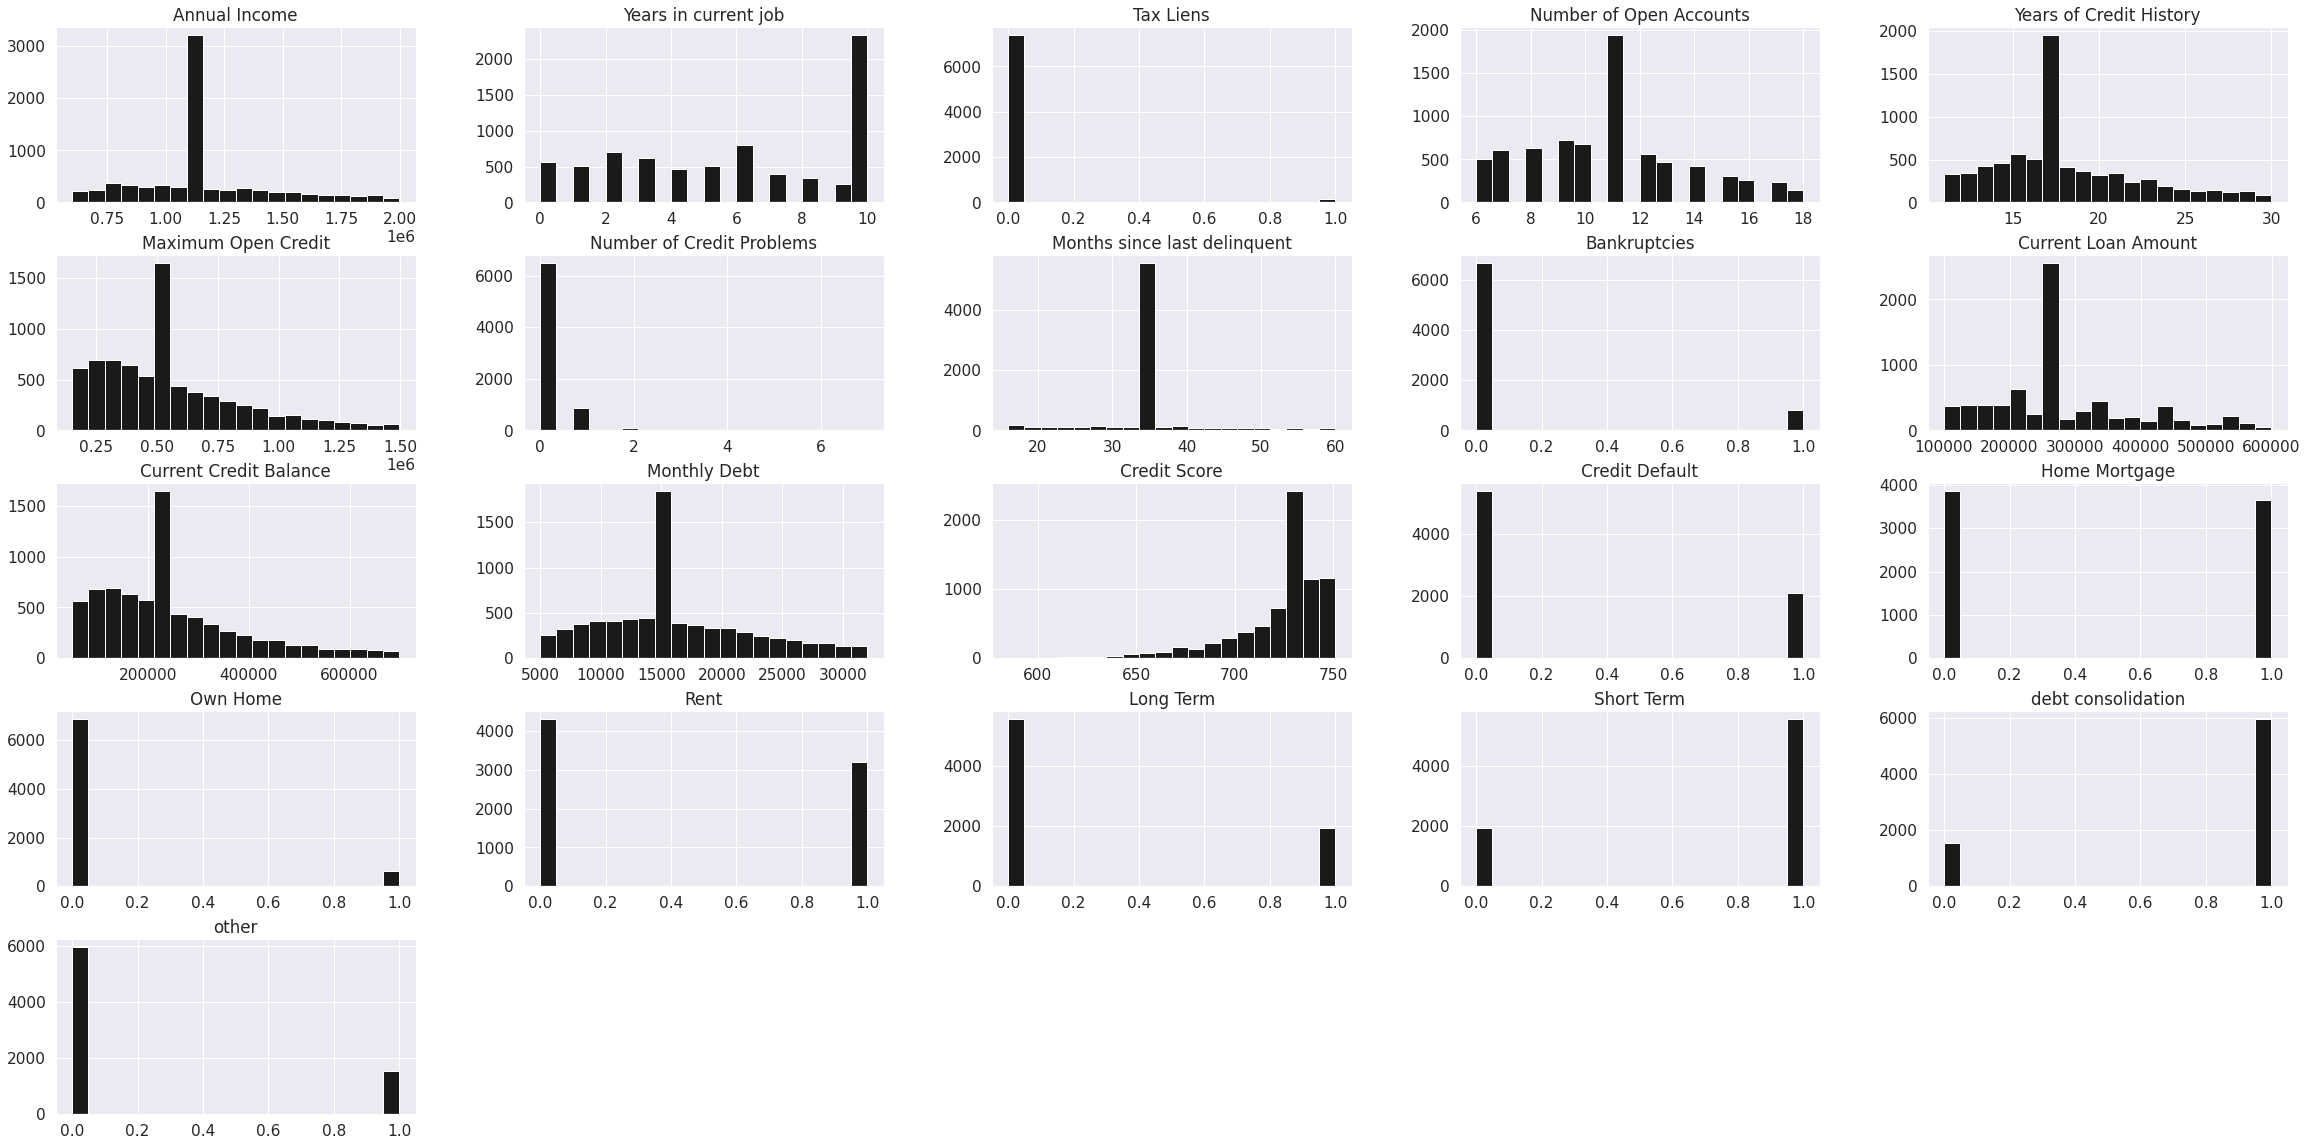

In [264]:
df.hist(color = 'k', bins = 20, figsize=(40,20))
plt.show()

In [265]:
df.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
Home Mortgage                   0
Own Home                        0
Rent                            0
Long Term                       0
Short Term                      0
debt consolidation              0
other                           0
dtype: int64

In [266]:
df.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Long Term,Short Term,debt consolidation,other
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.166272e+06,5.886267,0.017867,10.827067,18.055493,5.479783e+05,0.170000,34.345867,0.110133,284637.727733,246277.407200,16355.159200,721.937333,0.281733,0.486533,0.086267,0.427200,0.259200,0.740800,0.792533,0.207467
std,2.860685e+05,3.529503,0.132476,2.937512,4.228336,2.856099e+05,0.498598,6.490927,0.313077,109646.719386,141423.627171,6189.365169,25.147440,0.449874,0.499852,0.280776,0.494705,0.438225,0.438225,0.405520,0.405520
min,6.005710e+05,0.000000,0.000000,6.000000,11.000000,1.500400e+05,0.000000,16.000000,0.000000,100012.000000,50217.000000,5002.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.036113e+06,3.000000,0.000000,9.000000,15.300000,3.390365e+05,0.000000,34.000000,0.000000,219098.000000,143749.250000,12081.750000,715.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.138850e+06,6.000000,0.000000,11.000000,17.100000,4.870910e+05,0.000000,34.000000,0.000000,265694.000000,215270.000000,15719.500000,729.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.245536e+06,10.000000,0.000000,12.000000,20.300000,6.863175e+05,0.000000,34.000000,0.000000,332953.500000,309514.750000,19977.500000,738.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.997603e+06,10.000000,1.000000,18.000000,30.000000,1.496352e+06,7.000000,60.000000,1.000000,599742.000000,698554.000000,31999.000000,751.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   int64  
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [268]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

##Проверка гипотез

In [269]:
#df['Home Ownership'].value_counts(normalize=True)
#df['Annual Income'].value_counts(normalize=True)
#df['Years in current job'].value_counts(normalize=True)
#df['Tax Liens'].value_counts(normalize=True)
#df['Years of Credit History'].value_counts(normalize=True)
#df['Maximum Open Credit'].value_counts(normalize=True)
df['Number of Credit Problems'].value_counts(normalize=True) #- не нравится
#df['Months since last delinquent'].value_counts(normalize=True) - не нравится
#df['Bankruptcies'].value_counts(normalize=True)
#df['Purpose'].value_counts(normalize=True)
#df['Term'].value_counts(normalize=True)
#df['Current Loan Amount'].value_counts(normalize=True)


0.0    0.862533
1.0    0.117600
2.0    0.012400
3.0    0.004667
4.0    0.001200
5.0    0.000933
6.0    0.000533
7.0    0.000133
Name: Number of Credit Problems, dtype: float64

In [270]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [271]:
#import warnings
#warnings.simplefilter('ignore')

### Анализ целевой переменной

In [272]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
#NEW_FEATURE_NAMES = df_prep.columns.drop([TARGET_NAME]+BASE_FEATURE_NAMES)
NEW_FEATURE_NAMES = BASE_FEATURE_NAMES
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Long Term,Short Term,debt consolidation,other
0,Own Home,1138850.5,6,0.0,11.0,26.3,685960.0,1.0,34.0,1.0,debt consolidation,Short Term,265694.0,215270.0,7914.0,749.0,0,0,1,0,0,1,1,0
1,Own Home,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,34.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0,1,0,1,0,1,0
2,Home Mortgage,751412.0,8,0.0,11.0,17.1,1182434.0,0.0,34.0,0.0,debt consolidation,Short Term,265694.0,308389.0,13651.0,742.0,0,1,0,0,0,1,1,0
3,Own Home,805068.0,6,0.0,8.0,22.5,487091.0,1.0,34.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0,1,0,0,1,1,0
4,Rent,776264.0,8,0.0,13.0,13.6,385836.0,1.0,34.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0,0,1,0,1,1,0


In [273]:
BASE_FEATURE_NAMES

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Home Mortgage',
 'Own Home',
 'Rent',
 'Long Term',
 'Short Term',
 'debt consolidation',
 'other']

In [274]:
df_prep[TARGET_NAME].value_counts(normalize=True) 

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

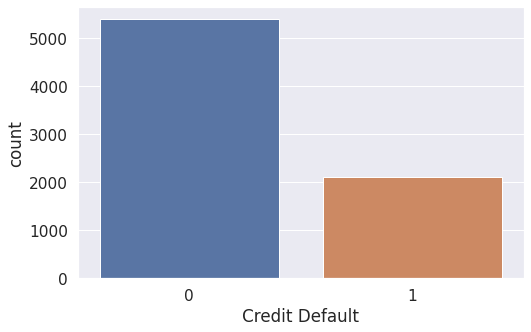

In [275]:
plt.figure(figsize=(8,5))
sns.countplot(x=TARGET_NAME, data=df_prep)
plt.title = TARGET_NAME
plt.show()

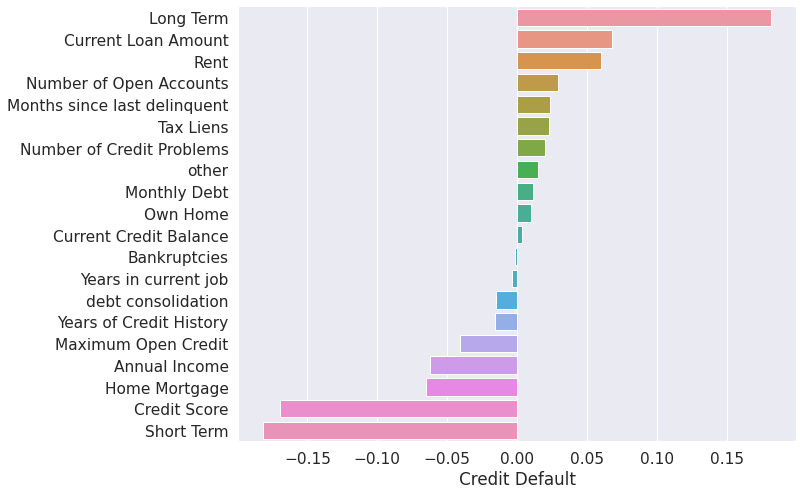

In [276]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1,-1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target, y = corr_with_target.index)
plt.title = 'Correlation with target variable'
plt.show()

###Оценка признаков корреляции в разрезе целевой переменной

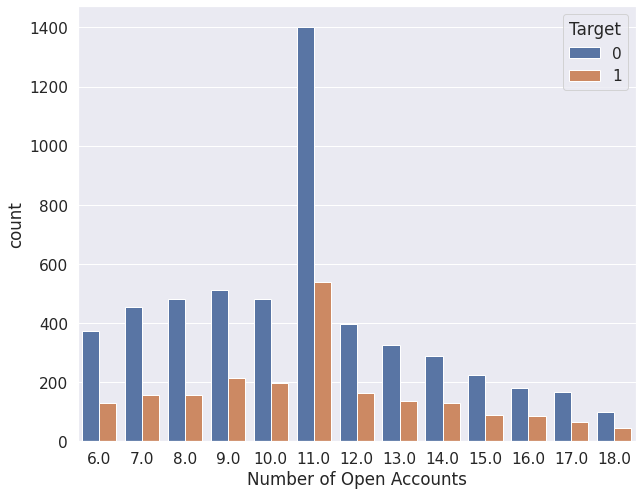

In [277]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Number of Open Accounts', hue=TARGET_NAME, data=df)
plt.title=('Number of Open Accounts grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

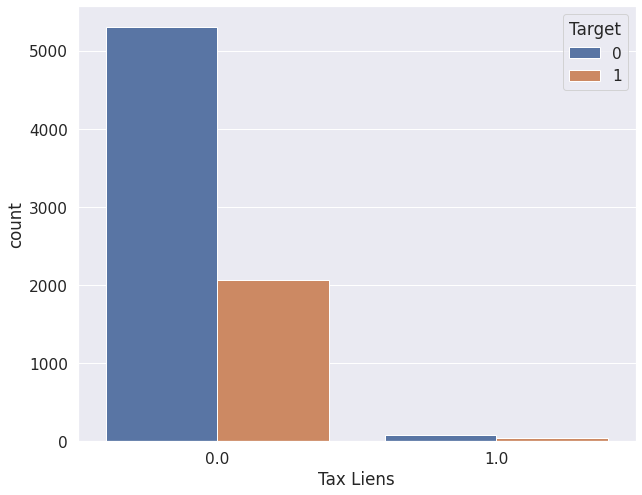

In [278]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Tax Liens', hue=TARGET_NAME, data=df_prep)
plt.title=('Tax Liens grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Наблюдение**  
Изучив получившийся график, видно, что значения : Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка) признаков Tax Liens и Number of Open Accounts имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно, например, объединить их в одну категорию.  
**Гипотеза**


*   Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
*   Альтернаятивая гипотеза: Отклонения в частотах выходят за рамки случайных колебаний, расходжения статистически значемы
*   Критерий: Хи-крадрат Пирсона
*   Уровень значимости $\alpha: 0.05$
*   Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий 1 и 0 признаков Tax Liens и Number of Open Accounts в выбранный критерий, после чего оценить значения достигаемого уровня значимости p-value и сравнить с его выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

Сформируем выборку и рассчитаем наблюдаемые частоты



In [279]:
df_prep['Tax Liens'].isin([0,1]).value_counts()

True    7500
Name: Tax Liens, dtype: int64

In [280]:
mask = df_prep['Tax Liens'].isin([0,1])

TL_and_CD = df_prep.loc[mask].sample(1000)
TL_and_CD = TL_and_CD[['Tax Liens',TARGET_NAME]]
TL_and_CD["ID"] = TL_and_CD.index

In [281]:
TL_and_CD

,Tax Liens,Credit Default,ID
3304,0.0,1,3304
6218,0.0,1,6218
4742,0.0,0,4742
3661,0.0,0,3661
161,0.0,0,161
...,...,...,...
3761,0.0,1,3761
4166,0.0,1,4166
6243,0.0,0,6243
1429,0.0,0,1429


In [282]:
table = TL_and_CD.pivot_table(values='ID', index='Tax Liens', columns=TARGET_NAME, aggfunc='count')
table

Credit Default,0,1
Tax Liens,,
0.0,689,294
1.0,12,5


In [283]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.9646263408621529

p-value больше выбранного порога, гипотезу о согласованности частот можно не отбрасывать

###Оценка признака Current Loan Amount  
Текущая сумма кредита

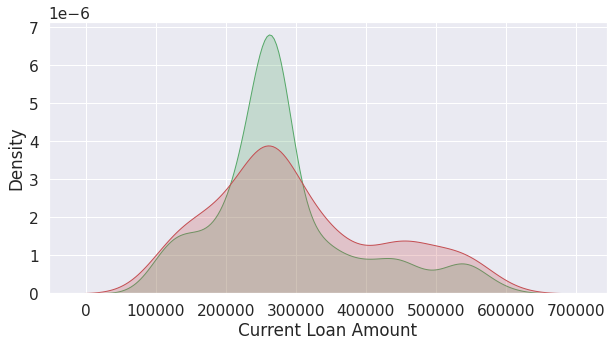

In [284]:
cla_with_target_s = df[['Current Loan Amount', TARGET_NAME]].sample(1000)
limit_bal_s = cla_with_target_s['Current Loan Amount']
limit_bal_target_0 = limit_bal_s[cla_with_target_s[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal_s[cla_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount')
plt.title='Current Loan Amount grouped by target variable'
plt.show()

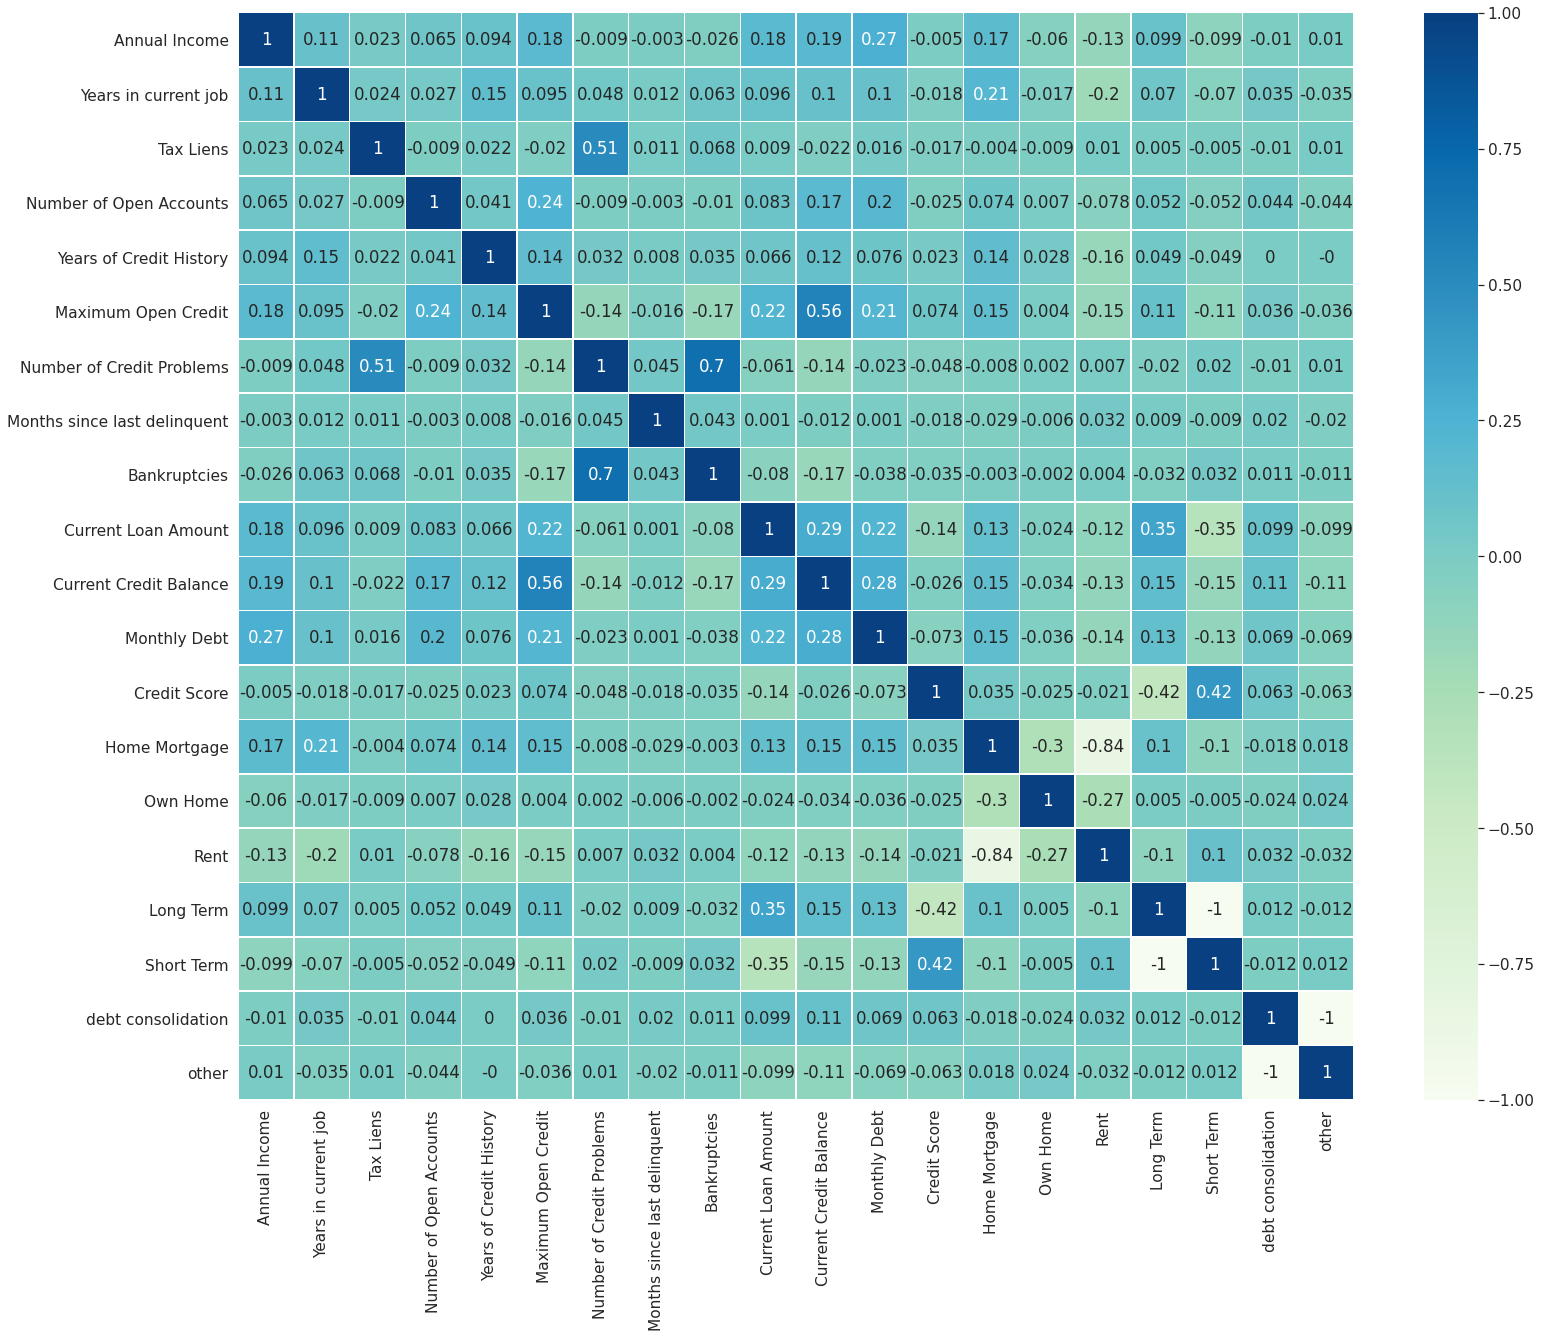

In [286]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title = 'Correlation matrix'
plt.show()

#Построение модели классификации

In [296]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

     |████████████████████████████████| 69.2MB 39kB/s 


In [297]:
import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [298]:
import warnings
warnings.simplefilter('ignore')

In [299]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [300]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [301]:
SCALER_FILE_PATH = '/content/drive/MyDrive/scaler.pkl'
MODEL_FILE_PATH = '/content/drive/MyDrive/model.pkl'

df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Long Term,Short Term,debt consolidation,other
0,Own Home,1138850.5,6,0.0,11.0,26.3,685960.0,1.0,34.0,1.0,debt consolidation,Short Term,265694.0,215270.0,7914.0,749.0,0,0,1,0,0,1,1,0
1,Own Home,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,34.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0,1,0,1,0,1,0
2,Home Mortgage,751412.0,8,0.0,11.0,17.1,1182434.0,0.0,34.0,0.0,debt consolidation,Short Term,265694.0,308389.0,13651.0,742.0,0,1,0,0,0,1,1,0
3,Own Home,805068.0,6,0.0,8.0,22.5,487091.0,1.0,34.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0,1,0,0,1,1,0
4,Rent,776264.0,8,0.0,13.0,13.6,385836.0,1.0,34.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0,0,1,0,1,1,0


In [303]:
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)
NEW_FEATURE_NAMES


Index([], dtype='object')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                7500 non-null   object  
 1   Annual Income                 7500 non-null   float64 
 2   Years in current job          7500 non-null   int64   
 3   Tax Liens                     7500 non-null   float64 
 4   Number of Open Accounts       7500 non-null   float64 
 5   Years of Credit History       7500 non-null   float64 
 6   Maximum Open Credit           7500 non-null   float64 
 7   Number of Credit Problems     7500 non-null   float64 
 8   Months since last delinquent  7500 non-null   float64 
 9   Bankruptcies                  7500 non-null   float64 
 10  Purpose                       7500 non-null   category
 11  Term                          7500 non-null   object  
 12  Current Loan Amount           7500 non-null   fl

In [305]:
df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'Home Mortgage', 'Own Home', 'Rent',
       'Long Term', 'Short Term', 'debt consolidation', 'other'],
      dtype='object')

**Отбор признаков**


In [359]:
#NUM_FEATURE_NAMES = ['Home Ownership', 'Purpose', 'Term', 'Annual Income', 'Years in current job', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
#NUM_FEATURE_NAMES = ['Home Mortgage', 'Own Home', 'Rent','Long Term', 'Short Term', 'debt consolidation', 'other', 'Annual Income', 'Years in current job', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
NUM_FEATURE_NAMES = [ 
                     'Annual Income', 
                     'Years in current job', 
                     'Tax Liens',
                     'Number of Open Accounts', 
                     'Years of Credit History',
                     'Maximum Open Credit', 
                     'Number of Credit Problems',
                     'Months since last delinquent', 
                     #'Bankruptcies', 
                     'Current Loan Amount', 
                     'Current Credit Balance', 
                     #'Monthly Debt', 
                     #'Credit Score', 
                     'Home Mortgage', 
                     'Own Home', 
                     #'Rent',
                     'Long Term', 
                     'Short Term', 
                     #'debt consolidation', 
                     #'other' 
                     ]
#, 'Own Home', 'Rent','Long Term', 'Short Term', 'debt consolidation', 'other', 'Annual Income', 'Years in current job', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score'
CAT_FEATURE_NAMES = ['Purpose']
#CAT_FEATURE_NAMES = ['Home Ownership','Purpose', 'Term']
SELECT_FEATURES_NAMES = NUM_FEATURE_NAMES

**Приведение типов для модели CatBoost**

In [360]:
for colname in CAT_FEATURE_NAMES:
  df[colname] = pd.Categorical(df[colname])

df[CAT_FEATURE_NAMES].dtypes

Purpose    category
dtype: object

###Нормализация данных

In [361]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

**Сохранение модели для нормализации данных**

In [362]:
with open(SCALER_FILE_PATH, 'wb') as file:
  pickle.dump(scaler, file)

**Разбиение на train и test**


In [363]:
X = df[SELECT_FEATURES_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=21)

In [364]:
SELECT_FEATURES_NAMES

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Current Loan Amount',
 'Current Credit Balance',
 'Home Mortgage',
 'Own Home',
 'Long Term',
 'Short Term']

**Балансировка целевой переменной**

In [365]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)

In [366]:
y_train

4864    0
7199    1
4716    1
2560    0
3474    0
       ..
48      1
772     1
5944    0
5327    1
7113    0
Name: Credit Default, Length: 5625, dtype: int64

In [367]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    4046
1    3158
Name: Credit Default, dtype: int64

In [368]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

###Построение и оценка базовых моделей


####Логистическая регрессия

In [369]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.62      0.80      0.70      4046
           1       0.59      0.37      0.45      3158

    accuracy                           0.61      7204
   macro avg       0.60      0.58      0.58      7204
weighted avg       0.61      0.61      0.59      7204

TEST

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1341
           1       0.42      0.38      0.40       534

    accuracy                           0.68      1875
   macro avg       0.59      0.59      0.59      1875
weighted avg       0.67      0.68      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1069  272
1                333  201


**k ближайших соседей**

In [370]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      4046
           1       0.74      0.65      0.69      3158

    accuracy                           0.75      7204
   macro avg       0.74      0.74      0.74      7204
weighted avg       0.75      0.75      0.74      7204

TEST

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1341
           1       0.32      0.36      0.34       534

    accuracy                           0.60      1875
   macro avg       0.53      0.53      0.53      1875
weighted avg       0.62      0.60      0.61      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               940  401
1               344  190


####Бустинговые алгоритмы

**XGBoost**

In [371]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      4046
           1       0.70      0.53      0.61      3158

    accuracy                           0.70      7204
   macro avg       0.70      0.68      0.68      7204
weighted avg       0.70      0.70      0.69      7204

TEST

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1341
           1       0.43      0.43      0.43       534

    accuracy                           0.68      1875
   macro avg       0.60      0.60      0.60      1875
weighted avg       0.67      0.68      0.68      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1040  301
1                307  227


**LightGBM**

In [372]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4046
           1       0.88      0.81      0.84      3158

    accuracy                           0.87      7204
   macro avg       0.87      0.86      0.87      7204
weighted avg       0.87      0.87      0.87      7204

TEST

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1341
           1       0.42      0.38      0.40       534

    accuracy                           0.67      1875
   macro avg       0.59      0.59      0.59      1875
weighted avg       0.66      0.67      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1057  284
1                329  205


**CatBoost**

In [373]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4046
           1       0.88      0.77      0.82      3158

    accuracy                           0.85      7204
   macro avg       0.86      0.84      0.85      7204
weighted avg       0.86      0.85      0.85      7204

TEST

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1341
           1       0.42      0.38      0.40       534

    accuracy                           0.67      1875
   macro avg       0.59      0.59      0.59      1875
weighted avg       0.66      0.67      0.67      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1060  281
1                331  203


##Выбор лучшей модели и подбор гиперпараметров

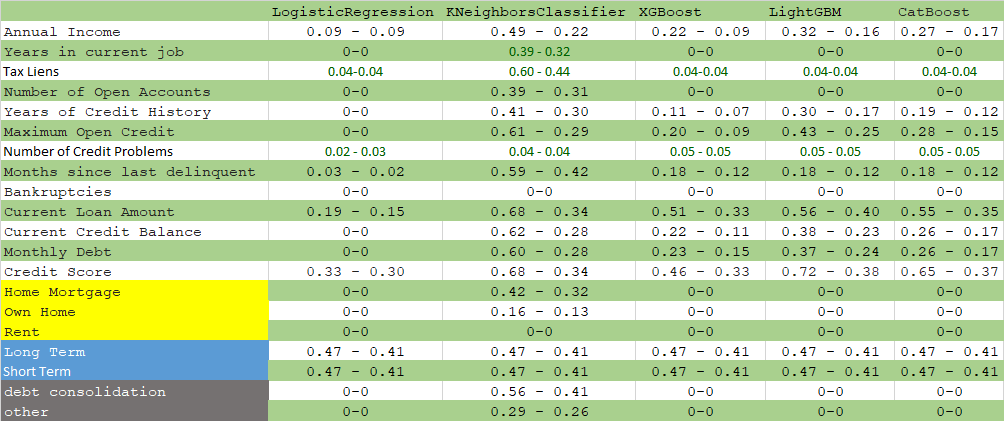

In [327]:
model_catb = catb.CatBoostClassifier(class_weights=[1,3.5], silent=True, random_state=221)

**Подбор гиперпараметров**

In [328]:
params = {'n_estimators':[50, 100, 200, 500], 
          'max_depth':[3, 5, 7, 10]}

In [329]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [330]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

CPU times: user 2.39 s, sys: 277 ms, total: 2.67 s
Wall time: 24.9 s


In [331]:
rs.best_score_

0.609784539073619

**Обучение и оценка финальной модели**

In [332]:
%%time

final_model = catb.CatBoostClassifier(**rs.best_params_)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

Learning rate set to 0.045203
0:	learn: 0.6924580	total: 2.82ms	remaining: 1.41s
1:	learn: 0.6917767	total: 5.88ms	remaining: 1.46s
2:	learn: 0.6912156	total: 8.17ms	remaining: 1.35s
3:	learn: 0.6907042	total: 10.5ms	remaining: 1.31s
4:	learn: 0.6902008	total: 13.1ms	remaining: 1.3s
5:	learn: 0.6897663	total: 15.8ms	remaining: 1.3s
6:	learn: 0.6892456	total: 19.2ms	remaining: 1.35s
7:	learn: 0.6888847	total: 21.8ms	remaining: 1.34s
8:	learn: 0.6885319	total: 24.8ms	remaining: 1.35s
9:	learn: 0.6881215	total: 27.8ms	remaining: 1.36s
10:	learn: 0.6877496	total: 31.1ms	remaining: 1.38s
11:	learn: 0.6874821	total: 34.1ms	remaining: 1.39s
12:	learn: 0.6871198	total: 37.4ms	remaining: 1.4s
13:	learn: 0.6869162	total: 39.8ms	remaining: 1.38s
14:	learn: 0.6866764	total: 43.2ms	remaining: 1.4s
15:	learn: 0.6865033	total: 46.1ms	remaining: 1.39s
16:	learn: 0.6863304	total: 48.9ms	remaining: 1.39s
17:	learn: 0.6861912	total: 51.4ms	remaining: 1.38s
18:	learn: 0.6860446	total: 54ms	remaining: 1.37

###Сохранение модели

#Улучшение полученной модели

In [333]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [334]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [335]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [336]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title = f"Learning curves ({type(estimator).__name__})"
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [337]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title = 'Importance of features'
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [338]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.58      0.97      0.72      4046
           1       0.67      0.09      0.15      3158

    accuracy                           0.58      7204
   macro avg       0.63      0.53      0.44      7204
weighted avg       0.62      0.58      0.47      7204

TEST

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1341
           1       0.31      0.06      0.10       534

    accuracy                           0.70      1875
   macro avg       0.51      0.50      0.46      1875
weighted avg       0.60      0.70      0.61      1875

CONFUSION MATRIX

col_0              0   1
Credit Default          
0               1274  67
1                504  30


In [374]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                      l2_leaf_reg=20,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      4046
           1       0.67      0.48      0.56      3158

    accuracy                           0.67      7204
   macro avg       0.67      0.65      0.64      7204
weighted avg       0.67      0.67      0.66      7204

TEST

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1341
           1       0.44      0.43      0.44       534

    accuracy                           0.68      1875
   macro avg       0.61      0.61      0.61      1875
weighted avg       0.68      0.68      0.68      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1051  290
1                302  232


In [376]:
final_model = catb.CatBoostClassifier(n_estimators=1000, max_depth=4,
                                      class_weights=[1, 2.5],
                                      silent=True, random_state=21)

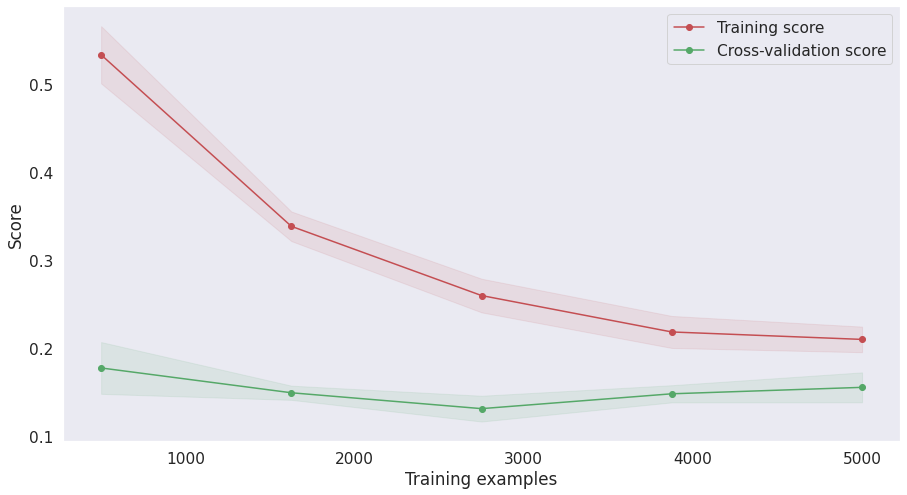

In [375]:
show_learning_curve_plot(final_model, X, y)

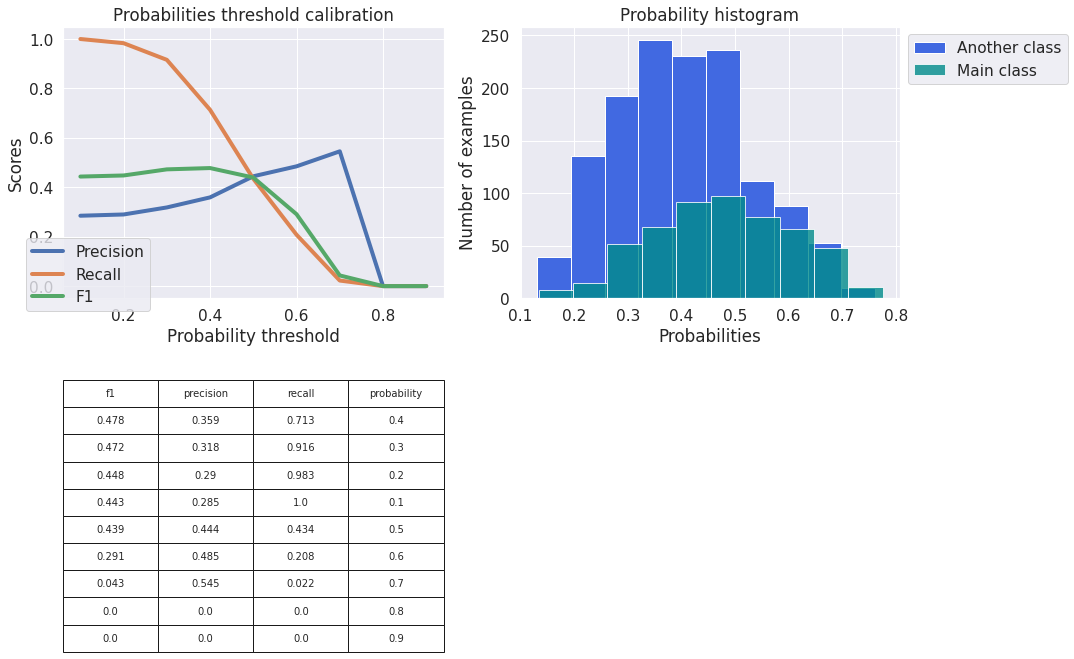

In [377]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

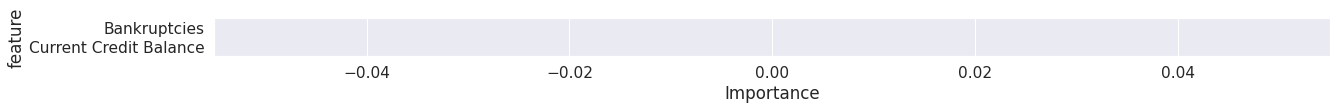

In [343]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

In [378]:
X_train.columns


Index(['Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Current Loan Amount',
       'Current Credit Balance', 'Home Mortgage', 'Own Home', 'Long Term',
       'Short Term'],
      dtype='object')

In [345]:
important_features_top

['Bankruptcies', 'Current Credit Balance']